In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_excel(r"C:\Users\fluca\Desktop\2-unioeste\Ciências Econômicas\4º ano\2º bimestre\Econometria II\2º trabalho\Dados exercicio de autocorrelação.xls")
df.head()

,data,preco_milho,taxa_cambio,ipca,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,2010.01,14.58,1.8740,0.75,NaN,-1.492914,NaN,NaN
1,2010.02,14.09,1.8102,0.78,0.85136,-1.492914,1.465251,1.105936
2,2010.03,13.84,1.7802,0.52,1.04628,-1.492914,1.842581,-2.104569
3,2010.04,13.68,1.7298,0.57,1.11328,-1.492914,1.529776,1.093151
4,2010.05,13.73,1.8159,0.43,1.30856,-1.492914,3.310965,-0.979104


In [11]:
print(df.columns)

Index(['data', 'preco_milho', 'taxa_cambio', 'ipca', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'],
      dtype='object')


In [12]:
df.drop(columns=(['data', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6','Unnamed: 7']), inplace=True)

In [13]:
# Definindo as variáveis independentes (X) e a variável dependente (y)
X = df[['taxa_cambio', 'ipca']]  # Variáveis independentes
y = df['preco_milho']            # Variável dependente

# Adicionando uma constante (intercepto) ao modelo
X = sm.add_constant(X)

# Ajustando o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Exibindo o resumo dos resultados
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            preco_milho   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     191.4
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           1.01e-43
Time:                        22:30:11   Log-Likelihood:                -656.63
No. Observations:                 168   AIC:                             1319.
Df Residuals:                     165   BIC:                             1329.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -16.2397      2.889     -5.621      

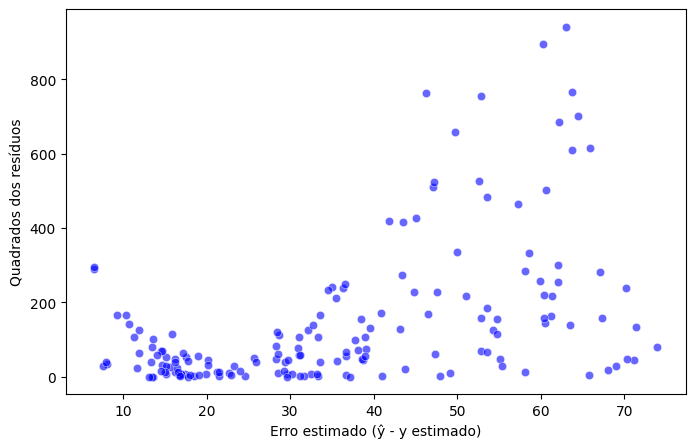

In [14]:
# Obtendo os valores ajustados (preditos)
y_estimado = modelo.fittedvalues

# Calculando os quadrados dos resíduos
quadrados_residuos = modelo.resid ** 2

# Criando o gráfico
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_estimado, y=quadrados_residuos, color='blue', alpha=0.6)

# Adicionando rótulos e título
plt.xlabel("Erro estimado (ŷ - y estimado)")
plt.ylabel("Quadrados dos resíduos")

# Exibindo o gráfico
plt.show()

In [15]:
# Obtendo os resíduos
residuos = modelo.resid

# Calculando o coeficiente de autocorrelação de primeira ordem (ρ)
rho = np.corrcoef(residuos[:-1], residuos[1:])[0, 1]
print("Coeficiente de autocorrelação de primeira ordem (ρ):", rho)

Coeficiente de autocorrelação de primeira ordem (ρ): 0.9076865842205402


In [16]:
# Parâmetros fornecidos
rho = 0.9076865842205402
beta_const = -16.2397
beta_taxa_cambio = 13.5075
beta_ipca = 11.1770

def transformar_variaveis(df, rho, beta_const, beta_taxa_cambio, beta_ipca):
    df_transformado = df.copy()
    
    # Ajuste da variável dependente (preco_milho)
    df_transformado['preco_milho'] = df['preco_milho'] - rho * df['preco_milho'].shift(1)
    
    # Ajuste das variáveis explicativas
    df_transformado['taxa_cambio'] = beta_taxa_cambio * (df['taxa_cambio'] - rho * df['taxa_cambio'].shift(1))
    df_transformado['ipca'] = beta_ipca * (df['ipca'] - rho * df['ipca'].shift(1))
    
    # Ajuste da constante
    df_transformado['const'] = beta_const * (1 - rho)  # ✅ Correção da constante
    
    return df_transformado

# Aplicar a transformação
df_transformado = transformar_variaveis(df, rho, beta_const, beta_taxa_cambio, beta_ipca)

# Exibir as primeiras linhas do DataFrame transformado
print(df_transformado.head())

   preco_milho  taxa_cambio      ipca     const
0          NaN          NaN       NaN -1.499142
1     0.855930     1.474956  1.109150 -1.499142
2     1.050696     1.851956 -2.101226 -1.499142
3     1.117618     1.538995  1.095379 -1.499142
4     1.312848     3.319924 -0.976661 -1.499142


In [17]:
df_transformado = df_transformado.iloc[1:].reset_index(drop=True)

In [18]:
df_transformado.head()

,preco_milho,taxa_cambio,ipca,const
0,0.855930,1.474956,1.109150,-1.499142
1,1.050696,1.851956,-2.101226,-1.499142
2,1.117618,1.538995,1.095379,-1.499142
3,1.312848,3.319924,-0.976661,-1.499142
4,1.457463,2.058974,-4.362442,-1.499142


In [19]:
# Definindo as variáveis independentes (incluindo a constante já existente)
X = df_transformado[['const', 'taxa_cambio', 'ipca']]  # Já inclui 'const'

# Definindo a variável dependente
y = df_transformado['preco_milho']

# Ajustando o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Exibindo o resumo dos resultados
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            preco_milho   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     6.360
Date:                Sun, 30 Mar 2025   Prob (F-statistic):            0.00219
Time:                        22:30:29   Log-Likelihood:                -452.09
No. Observations:                 167   AIC:                             910.2
Df Residuals:                     164   BIC:                             919.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.2580      0.374     -3.364      

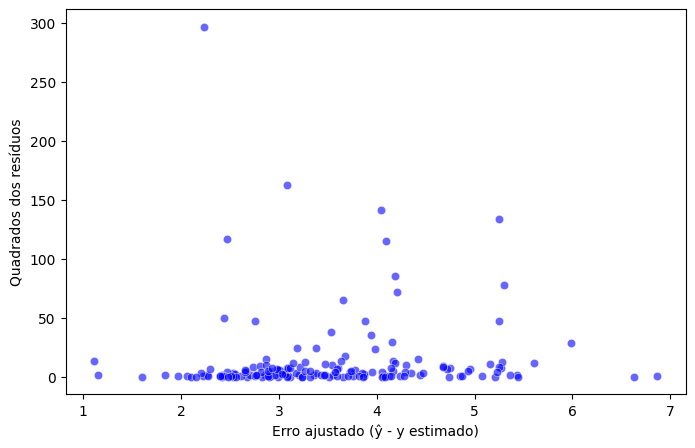

In [20]:
# Obtendo os valores ajustados (preditos)
y_estimado = modelo.fittedvalues

# Calculando os quadrados dos resíduos
quadrados_residuos = modelo.resid ** 2

# Criando o gráfico
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_estimado, y=quadrados_residuos, color='blue', alpha=0.6)

# Adicionando rótulos e título
plt.xlabel("Erro ajustado (ŷ - y estimado)")
plt.ylabel("Quadrados dos resíduos")

# Exibindo o gráfico
plt.show()

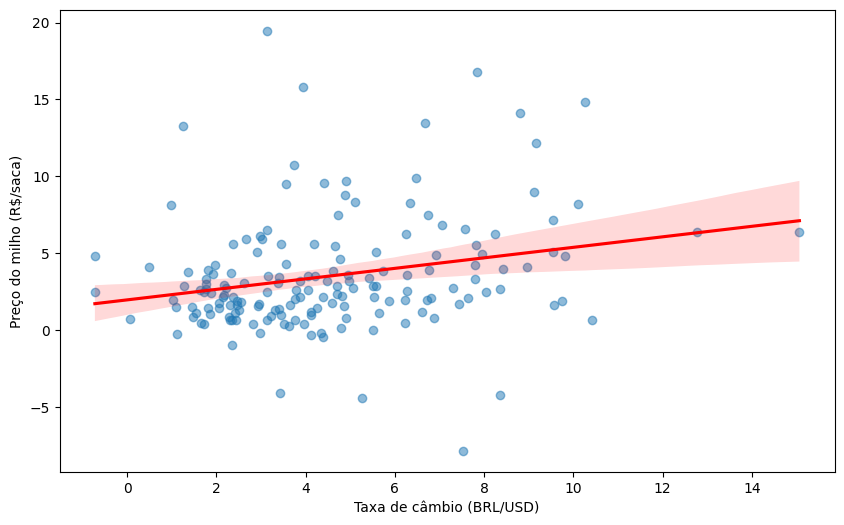

In [21]:
plt.figure(figsize=(10, 6))
sns.regplot(x='taxa_cambio', y='preco_milho', data=df_transformado, 
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel("Taxa de câmbio (BRL/USD)")
plt.ylabel("Preço do milho (R$/saca)")
plt.show()

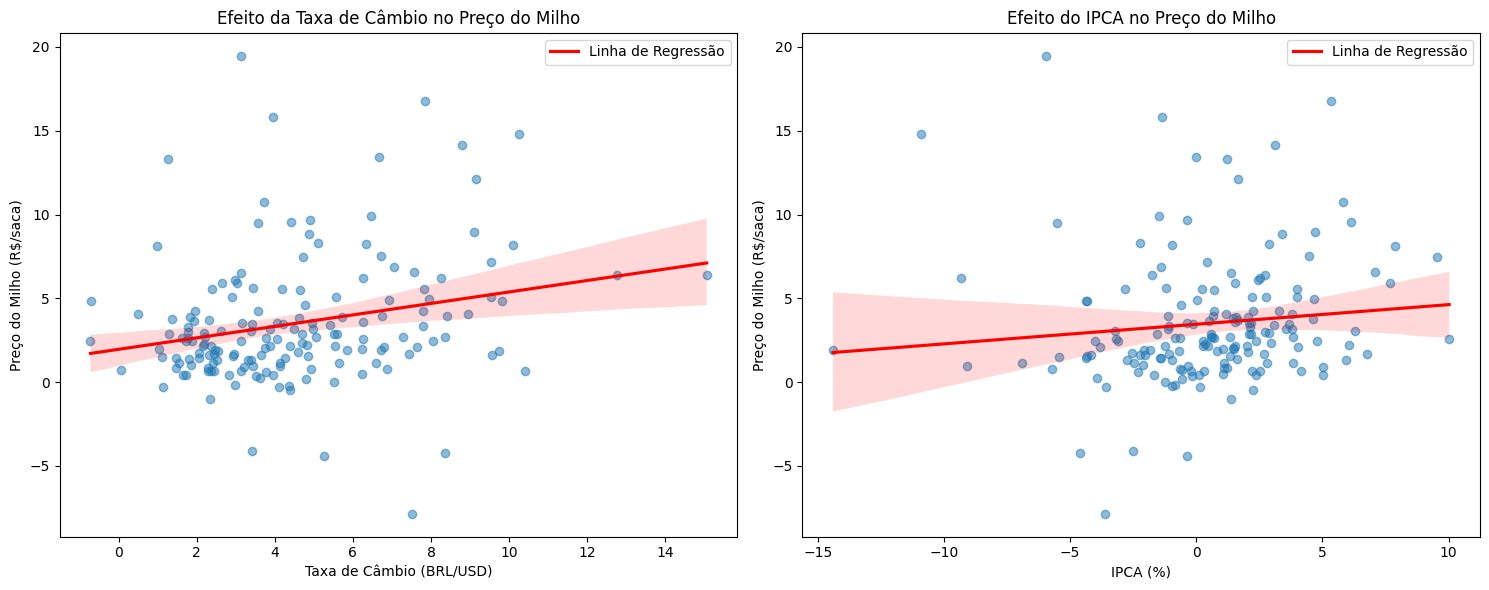

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração dos gráficos
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: taxa_cambio vs preco_milho
sns.regplot(
    x='taxa_cambio', 
    y='preco_milho', 
    data=df_transformado, 
    ax=axes[0],
    line_kws={'color': 'red', 'label': 'Linha de Regressão'},
    scatter_kws={'alpha': 0.5}
)
axes[0].set_xlabel("Taxa de Câmbio (BRL/USD)")
axes[0].set_ylabel("Preço do Milho (R$/saca)")
axes[0].set_title("Efeito da Taxa de Câmbio no Preço do Milho")
axes[0].legend()

# Gráfico 2: ipca vs preco_milho
sns.regplot(
    x='ipca', 
    y='preco_milho', 
    data=df_transformado, 
    ax=axes[1],
    line_kws={'color': 'red', 'label': 'Linha de Regressão'},
    scatter_kws={'alpha': 0.5}
)
axes[1].set_xlabel("IPCA (%)")
axes[1].set_ylabel("Preço do Milho (R$/saca)")
axes[1].set_title("Efeito do IPCA no Preço do Milho")
axes[1].legend()

plt.tight_layout()
plt.show()